In [1]:
%reload_ext embedder
import pandas as pd
from embedder import preprocessing
from embedder.regression import Embedder
from embedder.assessment import visualize
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')

/Users/dkn22/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.loc[train['StateHoliday'] == 0, 'StateHoliday'] = 'zero'

In [4]:
cat_sz = preprocessing.categorize(train)
emb_sz = preprocessing.pick_emb_dim(cat_sz)
X_encoded, encoders = preprocessing.encode_categorical(train)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded.drop('Sales', axis=1), X_encoded['Sales'])

In [6]:
embedder = Embedder(emb_sz)

In [7]:
embedder.fit(X_train[:10000], y_train[:10000], epochs=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/1
8000/8000 [==============================] - 1s 143us/step - loss: 17622139.9320 - r2: -0.1624 - val_loss: 3565268.2140 - val_r2: 0.7554

Embedder({'emb_sizes': OrderedDict([('Date', (942, 50)), ('StateHoliday', (5, 3))]), 'model': <keras.engine.training.Model object at 0x11ee59fd0>})

In [8]:
preds = embedder.predict(X_train[10000:11000])

In [9]:
embeddings = embedder.get_embeddings()

In [10]:
embeddings

{'Date': array([[-0.05726543,  0.02619588,  0.01145886, ..., -0.02033737,
          0.02703725,  0.0557902 ],
        [ 0.04935908,  0.03522506, -0.03978018, ..., -0.01758707,
          0.04144699, -0.05077449],
        [ 0.0064219 , -0.00862736, -0.02681473, ...,  0.03158002,
         -0.00659476,  0.02440868],
        ..., 
        [ 0.01471008, -0.01958689, -0.0293673 , ..., -0.01067376,
          0.00367379, -0.03082535],
        [ 0.0027268 , -0.02113206, -0.0032155 , ..., -0.02218754,
         -0.0356426 , -0.01932571],
        [ 0.03486346, -0.00916713, -0.04256342, ...,  0.0163544 ,
          0.02236119, -0.02053333]], dtype=float32),
 'StateHoliday': array([[ 0.0117417 , -0.03568152, -0.05335411],
        [-0.01801761, -0.01720955, -0.01865269],
        [-0.01420159,  0.03294466,  0.01954255],
        [ 0.00148958,  0.0118223 ,  0.04556577],
        [ 0.01440886,  0.01774685,  0.00759255]], dtype=float32)}

In [11]:
embedded = embedder.transform(X_train[:10000])

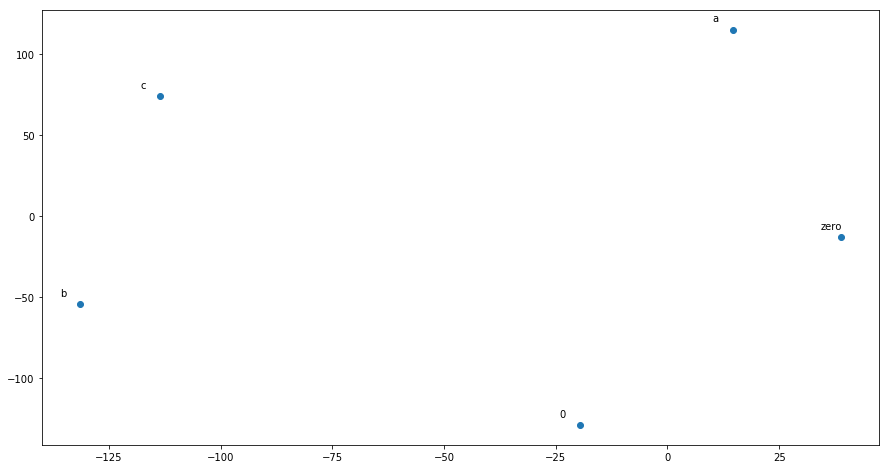

In [25]:
plt.figure(figsize=(15,8))
visualize(embeddings['StateHoliday'], labels=encoders['StateHoliday'].classes_)